# A sample architecture - linking peaks in nengo

In this tutorial we are recreating a small cedar example architecture in nengo. You can find the original cedar description of the example in cedar's source code here: https://github.com/cedar/cedar/blob/master/doc/pages/tutorials/DFT/DFT.dox

In [1]:
import sys
# sys.path.append("../../dft_in_nengo/")
from nengo_dft.cedar_modules import (
    GaussInput,
    Convolution,
#     Resize,
    Projection,
    Boost,
    make_gaussian,
    GaussKernel,
)
# from cedar_utils.parse_cedar_objects import make_connection
import nengo
import nengo_dft
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import nengo_gui.jupyter

%matplotlib inline

In [2]:
# need to add resize module
class Resize(object):
    def __init__(self, sizes_in, sizes_out, name=None):
        self.sizes_out = sizes_out
        self.sizes_in = sizes_in
        self.name = name
        
        self.make_node()
        
    def update(self, inp):
        if self.sizes_in != []:
            out = inp.reshape(*self.sizes_in)
        out = resize(inp, self.sizes_out)
        
        return out.flatten()
    
    def make_node(self):
        if self.name is not None:
            self.node = nengo.Node(lambda t, x: self.update(x), 
                          size_in=int(np.prod(self.sizes_in)) if self.sizes_in != [] else 1, 
                          size_out=int(np.prod(self.sizes_out)) if self.sizes_out != [] else 1,
                          label=self.name)
        else:
            self.node = nengo.Node(lambda t, x: self.update(x), 
                          size_in=int(np.prod(self.sizes_in)) if self.sizes_in != [] else 1, 
                          size_out=int(np.prod(self.sizes_out)) if self.sizes_out != [] else 1)
            
# need to add kernel to convolution module?
# or even need to reimplement convolution module completely? it says that only the 
# case for the spatial reasoning architecture is implemented

In [84]:
model = nengo.Network()

dt = 0.001
tau = 0.002 / dt

with model:
    # non neural field inputs of path one
    gauss_input1 = GaussInput(sizes=[100], centers=[24], sigmas=[3], a=1, name="gauss_1")
    convolution1 = Convolution(sizes=[100], border_type="zero-filled borders", 
                               kernel=GaussKernel(c=1, sigma=3, normalize=True, dims=1), name="convolution_1")
    resize1 = Resize(sizes_in=[100], sizes_out=[50], name="resize_1")
    projection1 = Projection(sizes_out=[50,40], sizes_in=[50], dimension_mapping={0:0},
                             compression_type="sum", name="projection_1")
    
    neural_field1 = nengo_dft.DFT(shape=[100], h=-1, dt=dt, tau=tau, global_inh=-0.01)
    #print(neural_field1.dt)
    neural_field1.add_kernel(exc=3, inh=0)
    
    # make connections
    nengo.Connection(gauss_input1.node, neural_field1.s, synapse=None)
#    nengo.Connection(neural_field1.s, convolution1.node, synapse=0)
#    nengo.Connection(convolution1.node, resize1.node, synapse=0)
#    nengo.Connection(resize1.node, projection1.node, synapse=0)

    nf_1_probe = nengo.Probe(neural_field1.g.neurons)
    
"""
   # non neural field inputs of path two
    gauss_input2 = GaussInput(sizes=[80], centers=[31], sigmas=[12], a=1, name="gauss_2")
    convolution2 = Convolution(sizes=[80], border_type="zero-filled borders",
                               kernel=GaussKernel(c=1, sigma=3, normalize=True, dims=1), name="convolution_2")
    resize2 = Resize(sizes_in=[80], sizes_out=[40], name="resize_2")
    projection2 = Projection(sizes_out=[50,40], sizes_in=[40], dimension_mapping={0:1},
                             compression_type="sum", name="projection_2")
    
    neural_field2 = nengo_dft.DFT(shape=[80], h=-1, dt=dt, tau=tau)
    neural_field2.add_kernel(exc=3, inh=0)
    
    nengo.Connection(gauss_input2.node, neural_field2.s, synapse=0)
    nengo.Connection(neural_field2.s, convolution2.node, synapse=0)
    nengo.Connection(convolution2.node, resize2.node, synapse=0)
    nengo.Connection(resize2.node, projection2.node, synapse=0)
    
    
    # boost
    boost = Boost(strength=4.4, name="boost")
    boost_projection = Projection(sizes_out=[50,40], sizes_in=[], dimension_mapping={}, compression_type="max",
                                  name="Upscale projection")
    
    neural_field3 = nengo_dft.DFT(shape=[50,40], h=-5)
    neural_field3.add_kernel(exc=3, inh=0)
    
    nengo.Connection(projection1.node, neural_field3.s, synapse=0)
    nengo.Connection(projection2.node, neural_field3.s, synapse=0)
    
    nengo.Connection(boost.node, boost_projection.node, synapse=0)
    nengo.Connection(boost_projection.node, neural_field3.s, synapse=0)

    
    nf_result_probe = nengo.Probe(neural_field3.g.neurons)
    
    nf_2_probe = nengo.Probe(neural_field2.g.neurons)
    
    
    p_g1 = nengo.Probe(gauss_input1.node)
    p_g2 = nengo.Probe(gauss_input2.node)
"""

'\n   # non neural field inputs of path two\n    gauss_input2 = GaussInput(sizes=[80], centers=[31], sigmas=[12], a=1, name="gauss_2")\n    convolution2 = Convolution(sizes=[80], border_type="zero-filled borders",\n                               kernel=GaussKernel(c=1, sigma=3, normalize=True, dims=1), name="convolution_2")\n    resize2 = Resize(sizes_in=[80], sizes_out=[40], name="resize_2")\n    projection2 = Projection(sizes_out=[50,40], sizes_in=[40], dimension_mapping={0:1},\n                             compression_type="sum", name="projection_2")\n    \n    neural_field2 = nengo_dft.DFT(shape=[80], h=-1, dt=dt, tau=tau)\n    neural_field2.add_kernel(exc=3, inh=0)\n    \n    nengo.Connection(gauss_input2.node, neural_field2.s, synapse=0)\n    nengo.Connection(neural_field2.s, convolution2.node, synapse=0)\n    nengo.Connection(convolution2.node, resize2.node, synapse=0)\n    nengo.Connection(resize2.node, projection2.node, synapse=0)\n    \n    \n    # boost\n    boost = Boost(st

In [85]:
sim = nengo.Simulator(model, dt=dt)
# 30.0 ran for 14 min
with sim:
    sim.run(20.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [69]:
nengo_gui.jupyter.InlineGUI(model)

In [35]:
print(sim.data[nf_result_probe].shape)
print(sim.data[nf_1_probe].shape)
print(sim.data[nf_2_probe].shape)

(30000, 2000)
(30000, 100)
(30000, 80)


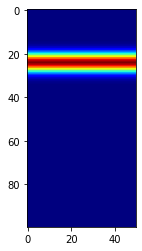

In [54]:
plt.figure(figsize=(14,4))
plt.imshow(sim.data[p_g1][::100].T, cmap="jet")
plt.title("First gaussian input")
plt.show()

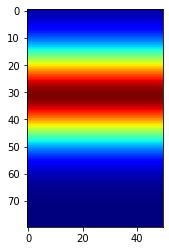

In [47]:
plt.figure(figsize=(14,4))
plt.imshow(sim.data[p_g2][::100].T, cmap="jet")
plt.title("Second gaussian input")
plt.show()

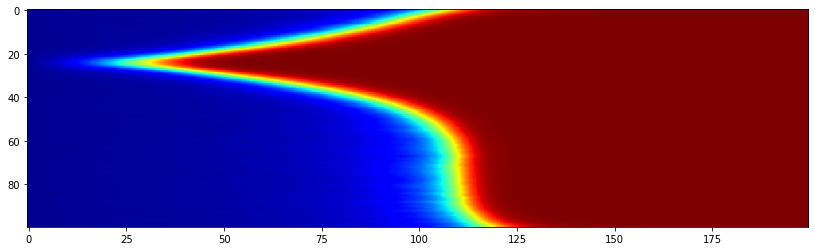

In [86]:
plt.figure(figsize=(14,4))
plt.imshow(sim.data[nf_1_probe][::100].T, cmap="jet", vmin=0, vmax=1, aspect="auto")
plt.title("Neural Field receiving input from first gaussian input")
plt.show()

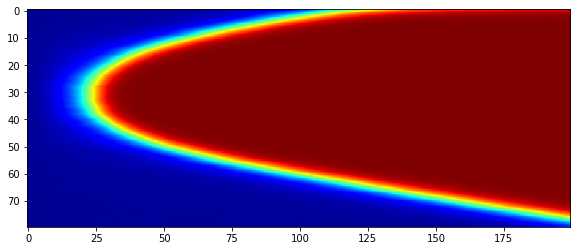

In [61]:
plt.figure(figsize=(14,4))
plt.imshow(sim.data[nf_2_probe][::100].T, cmap="jet", vmin=0, vmax=1)
plt.title("Neural Field receiving input from second gaussian input")
plt.show()

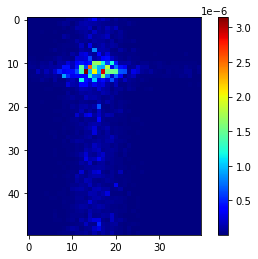

In [68]:
plt.imshow(sim.data[nf_result_probe][-1].reshape(50,40), cmap="jet")#, vmin=0, vmax=1)
plt.title("2D Neural Field")
plt.colorbar()
plt.show()